In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import glob
import re

In [86]:
Months = []
def get_excel_files(folder_path):
    os.chdir(folder_path)
    excel_files = [file for file in glob.glob("*.xlsx") if not file.startswith("~$")]
    return excel_files

# Example usage:
path = "D:\Desktop\Bangalore Vehicle" # Replace this with the path to your folder
excelfiles = get_excel_files(path)


print("Excel files found in the folder:")
for file in excelfiles:
    print(file)
    month = file[7:12]  # Extract the month from the file name
    Months.append(month)
print(len(excelfiles))

Excel files found in the folder:
Month00JAN22.xlsx
Month01FEB22.xlsx
Month02MAR22.xlsx
Month03APR22.xlsx
Month04MAY22.xlsx
Month05JUN22.xlsx
Month06JUL22.xlsx
Month07AUG22.xlsx
Month08SEP22.xlsx
Month09OCT22.xlsx
Month10NOV22.xlsx
Month11DEC22.xlsx
Month12JAN23.xlsx
Month13FEB23.xlsx
Month14MAR23.xlsx
Month15APR23.xlsx
Month16MAY23.xlsx
Month17JUN23.xlsx
Month18JUL23.xlsx
Month19AUG23.xlsx
Month20SEP23.xlsx
Month21OCT23.xlsx
Month22NOV23.xlsx
Month23DEC23.xlsx
24


In [87]:
# Create ARRAYS
Data = [] # All Consolated Data
NONTRANS = [] 
TRANS = [] 
LGV = [] 
BUS = [] 
TAXI = [] 
LMV = [] 


In [88]:
'''
nontrans = data[4:12]
trans = data[14:16]
lgv = data[18:20]
bus = data[21:22]
taxies = data[24:27]
lmv = data[29:31]
'''


'\nnontrans = data[4:12]\ntrans = data[14:16]\nlgv = data[18:20]\nbus = data[21:22]\ntaxies = data[24:27]\nlmv = data[29:31]\n'

In [89]:
def Appendit(filename):
    filepath = path+"\\"+filename
    data = pd.read_excel(filepath)
    data = clean(data)
    Data.append(data)
    NONTRANS.append(data[0:8])  
    TRANS.append(data[9:11])
    LGV.append(data[12:14])
    BUS.append(data[15:16]) 
    TAXI.append(data[17:20]) 
    LMV.append(data[21:23])

In [90]:
def clean(vehicle):
    # Rename Them
    data = vehicle
    data = data[4:]
    data.rename(columns={'Column2': 'Categories',
                     'Column3': 'Sold so far',
                     'Column4': 'Sold',
                    'Column5': 'Total'}, inplace=True)
    # delete things you don't need
    data.drop(columns=['Column1'], inplace=True)
    # delete NAN values
    data.dropna(inplace=True)
    # Convert
    
    clmns = data.columns
    clmns = list(clmns)
    for i in clmns:
        if i != 'Categories':
            data[i] = data[i].astype(int)
    
    return data


In [91]:
for i in excelfiles:
    Appendit(i)

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6164\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6164\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6164\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Column2': 'Categories',
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Column1'], inplace=True)
C:\Users\DAYDREAMER\AppData\Local\Temp\ipykernel_6044\2442672005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [92]:
# Add to array
vehicles = [NONTRANS,TRANS,LGV,BUS,
           TAXI,LMV]



In [93]:
TableNames = ['nontrans', 'trans', 'lgv', 'bus', 'taxi', 'lmv']

In [94]:
## Upload to SQL
import psycopg2

In [95]:
from sqlalchemy import create_engine

In [96]:
host = "localhost"
name = "postgres"
dbn = "Bangalore Vehicles"
password = "root"
port = 5432 

In [97]:
conn = psycopg2.connect(host=host,dbname=dbn,
                        user=name,password=password,
                        port=port)
cur = conn.cursor()

In [333]:
for i in range(len(TableNames)):
    cur.execute("""
        CREATE TABLE IF NOT EXISTS {} (
            Month VARCHAR(255),
            Category VARCHAR(255),
            Sold INT
        );
    """.format(TableNames[i]))

In [334]:
# WORKING! 
for i in range(len(vehicles)):
    lenveh = len(vehicles[i])
    print("Completed!")
    for x in range(len(vehicles[i])):
        Name = vehicles[i][x]['Categories']
        Sold = vehicles[i][x]['Sold']
        for y, z in zip(Name, Sold):
            # print(f" {TableNames[i]}{y} {z} {Months[x]}")
            cur.execute("""
                INSERT INTO {} (Month, Category, Sold)
                VALUES (%s, %s, %s);
            """.format(TableNames[i]), (Months[x], y, z))
    print("Completed #2!")

Completed!
Completed #2!
Completed!
Completed #2!
Completed!
Completed #2!
Completed!
Completed #2!
Completed!
Completed #2!
Completed!
Completed #2!


In [103]:
conn.commit()

In [104]:
cur.execute("""
                SELECT * FROM trans
            """)

In [99]:
# Fetch all rows from the result
rows = cur.fetchall()

# Print the query result
for row in rows:
    print(row)

('JAN22', 'Multi Axled/Articulated Vehicle', 14)
('JAN22', 'Trucks and Lorries', 583)
('FEB22', 'Multi Axled/Articulated Vehicle', 29)
('FEB22', 'Trucks and Lorries', 451)
('MAR22', 'Multi Axled/Articulated Vehicle', 32)
('MAR22', 'Trucks and Lorries', 506)
('APR22', 'Multi Axled/Articulated Vehicle', 23)
('APR22', 'Trucks and Lorries', 563)
('MAY22', 'Multi Axled/Articulated Vehicle', 23)
('MAY22', 'Trucks and Lorries', 563)
('JUN22', 'Multi Axled/Articulated Vehicle', 23)
('JUN22', 'Trucks and Lorries', 563)
('JUL22', 'Multi Axled/Articulated Vehicle', 23)
('JUL22', 'Trucks and Lorries', 563)
('AUG22', 'Multi Axled/Articulated Vehicle', 23)
('AUG22', 'Trucks and Lorries', 563)
('SEP22', 'Multi Axled/Articulated Vehicle', 23)
('SEP22', 'Trucks and Lorries', 563)
('OCT22', 'Multi Axled/Articulated Vehicle', 55)
('OCT22', 'Trucks and Lorries', 1071)
('NOV22', 'Multi Axled/Articulated Vehicle', 36)
('NOV22', 'Trucks and Lorries', 578)
('DEC22', 'Multi Axled/Articulated Vehicle', 228)
('D

# ALL TABLES SUCESSFULLY UPDATED

# ANALYSIS STARTS HERE

## EDA

In [60]:
i = 0
x = 12
lis = vehicles[i][x]['Sold']
lis


4     34791
5     13737
6         3
7        75
8        26
9        51
10        0
11       73
Name: Sold, dtype: int32

In [297]:
lis = list(lis)
lis

['Categories', 'Sold so far', 'Sold', 'Total']

In [293]:
lis[2:]

[3, 75, 26, 51, 0, 73]

In [62]:
bikesold = []
carssold = []
otherssold = []
nontransold = [bikesold,carssold,otherssold]

In [63]:
for i in range(len(NONTRANS)):
    sales = NONTRANS[i]['Sold']
    sales = list(sales)
    bikesold.append(sales[0])
    carssold.append(sales[1])
    ots = sales[2:]
    total = 0
    for n in ots:
        total += n
    otherssold.append(total)
        

In [69]:
year23bikes = bikesold[12:]
year23cars = carssold[12:]
year23others = otherssold[12:]

In [72]:
totalbike = sum(year23bikes)
totalcar = sum(year23cars)
totalothers = sum(year23others)

In [73]:
# Define custom colors
custom_colors = ['#001524', '#15616D', '#FFECD1', '#FF7D00', '#78290F']


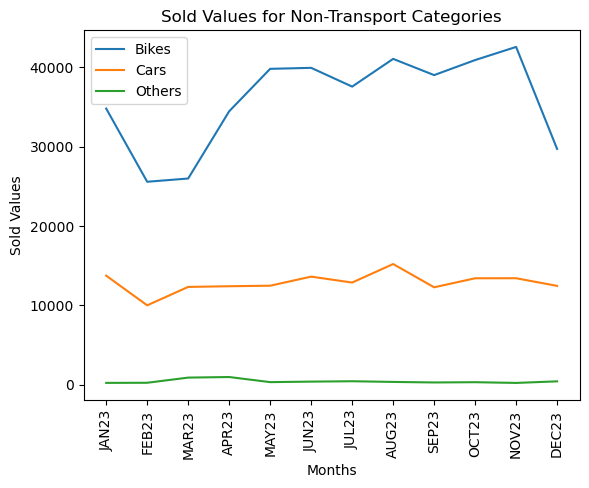

In [71]:
# Plot line plots for each category
plt.plot(Months[12:], year23bikes, label='Bikes')
plt.plot(Months[12:], year23cars, label='Cars')
plt.plot(Months[12:], year23others, label='Others')

# Add labels and legend
plt.xlabel('Months')
plt.ylabel('Sold Values')
plt.title('Sold Values for Non-Transport Categories')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [79]:
import random

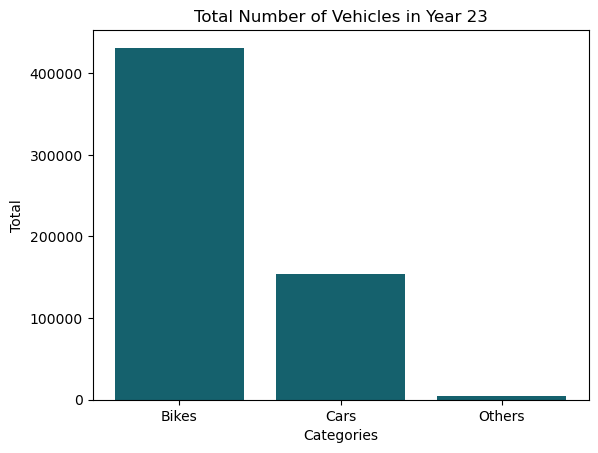

In [82]:
# Categories and their corresponding totals
categories = ['Bikes', 'Cars', 'Others']
totals = [totalbike, totalcar, totalothers]

# Plotting the bar graph
plt.bar(categories, totals, color=random.choice(custom_colors))
plt.xlabel('Categories')
plt.ylabel('Total')
plt.title('Total Number of Vehicles in Year 23')
plt.show()

# SQL Queries

In [108]:


cur.execute("""
                SELECT 
                    n.*,
                    t.*
                FROM 
                    nontrans n
                LEFT OUTER JOIN 
                    taxi t ON n.month = t.month AND t.month = 'JAN23'
                WHERE 
                    n.month = 'JAN23'
                    AND (n.category = 'Two Wheelers' OR n.category = 'Cars');
            """)


In [109]:
# Fetch all rows from the result
rows = cur.fetchall()

# Print the query result
for row in rows:
    print(row)

('JAN23', 'Two Wheelers', 34791, 'JAN23', 'Motor Cabs', 1255)
('JAN23', 'Two Wheelers', 34791, 'JAN23', 'Maxi Cabs', 82)
('JAN23', 'Two Wheelers', 34791, 'JAN23', 'Others', 0)
('JAN23', 'Cars', 13737, 'JAN23', 'Motor Cabs', 1255)
('JAN23', 'Cars', 13737, 'JAN23', 'Maxi Cabs', 82)
('JAN23', 'Cars', 13737, 'JAN23', 'Others', 0)
